## Assignment 4
_(50 Points)_ We learned in class about Monte Carlo Integration and in particular computed a similar integral to this one
$$
I = \int_{-1}^{1} e^{-x^2} dx \approx 1.49365
$$
_(5 Points)_ Plot the function in that interval and using the Monte Carlo method described in class, compute that integral for $N=10000$. What value do you get?

In [202]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [452]:
f = lambda a: np.exp(-a**2)

def monte_carlo(n, a, b, c, d, f):
    x = np.random.uniform(a, b, n)
    y = np.random.uniform(c, d, n)
    
    inside_bool = y <= f(x)
    
    x_in = x[inside_bool]
    y_in = y[inside_bool]
    
    approximation = (b-a)/float(n)*float(np.sum(inside_bool))
    return approximation

RealValue: 1.49365, Approximation:0.7463


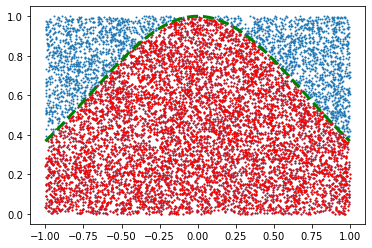

In [80]:
N = 10000
REAL_VALUE = 1.49365
# First we will compute the curve

x_real = np.linspace(-1, 1, N)
y_real = f(x_real)

plt.plot(x_real, y_real, '--g', linewidth=3)

# Now we apply montecarlo integration
x = np.random.uniform(low=-1, high=1, size=[N, 1])
y = np.random.uniform(low=0, high=1, size=[N, 1])

inside_bool = y <= f(x)

x_in = x[inside_bool]
y_in = y[inside_bool]

approx = float(np.sum(inside_bool))/N

print("RealValue: {}, Approximation:{}".format(REAL_VALUE, approx))

plt.scatter(x, y, s=1)
plt.scatter(x_in, y_in, color='r', s=1)
plt.show()

Clearly we have a problem, the scatter plot show us that most of the points in the region were explored, but we still obtain exactly half of the target value, why? let us look at the same code but with more points.

RealValue: 1.49365, Approximation:0.74565


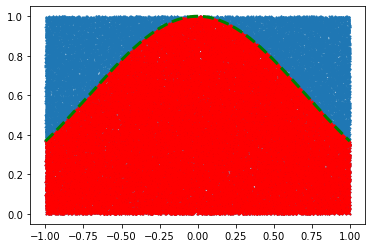

In [207]:
N = N*10

x_real = np.linspace(-1, 1, N)
y_real = f(x_real)

plt.plot(x_real, y_real, '--g', linewidth=3)

x = np.random.uniform(low=-1, high=1, size=[N, 1])
y = np.random.uniform(low=0, high=1, size=[N, 1])

inside_bool = y <= f(x)

x_in = x[inside_bool]
y_in = y[inside_bool]

approx = float(np.sum(inside_bool))/N

print("RealValue: {}, Approximation:{}".format(REAL_VALUE, approx))

plt.scatter(x, y, s=1)
plt.scatter(x_in, y_in, color='r', s=1)
plt.plot()
plt.show()

Just a little improvement, at this point something must be going on at the numbers given by the random number generator

(array([ 9879., 10022.,  9984., 10015., 10089.,  9871., 10111.,  9916.,
        10060., 10053.]),
 array([2.89843684e-05, 1.00022941e-01, 2.00016898e-01, 3.00010855e-01,
        4.00004813e-01, 4.99998770e-01, 5.99992727e-01, 6.99986684e-01,
        7.99980641e-01, 8.99974598e-01, 9.99968555e-01]),
 <a list of 10 Patch objects>)

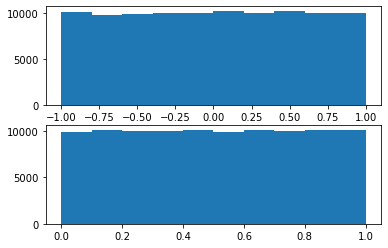

In [208]:
plt.subplot(2,1,1)
plt.hist(x)

plt.subplot(2,1,2)
plt.hist(y)

And as shown almost every point on the region is covered by the distribution, and maybe that is the problem, lets see the same graph but viewing only the points that were outside the curve

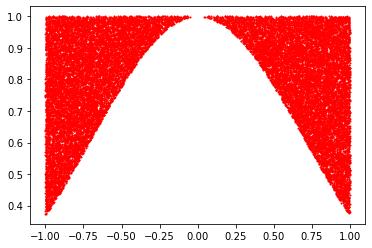

There were 25435 points outside the target region vs 74565 points into the region.


(array([ 310.,  856., 1276., 1752., 2214., 2669., 3122., 3672., 4354.,
        5210.]),
 array([0.37383694, 0.4364501 , 0.49906326, 0.56167642, 0.62428958,
        0.68690275, 0.74951591, 0.81212907, 0.87474223, 0.93735539,
        0.99996855]),
 <a list of 10 Patch objects>)

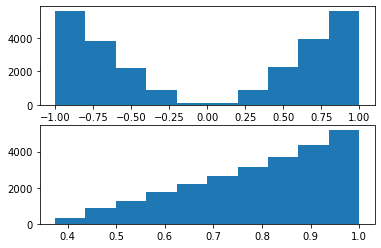

In [209]:
outside_bool = y > f(x)

x_out = x[outside_bool]
y_out = y[outside_bool]

plt.scatter(x_out, y_out, color='r', s=1)
plt.plot()
plt.show()

print("There were {} points outside the target region vs {} points into the region.".format(len(x_out), len(x_in)))

plt.subplot(2,1,1)
plt.hist(x_out)

plt.subplot(2,1,2)
plt.hist(y_out)

Actually there is not any strange behavior, and therefore we are missing something. Notice that if by some chance, every value were inside the area the maximum number would be 1, therefore the error is not in the choosen random number generator (or maybe in part), a uniform distribution will guarantee that almost every point in the region will have the same probability to appear on the random number generator, with that we have to look to some diferent area on the problem, we already saw that this value is almost halve of the real value, wich is exactly the segment over which the region exists $(1 - (-1)) = 2$, and I'm not sure if it is the correct way, but my guess is that assuming that we have the integral 
$$\int_a^b f(x),$$
and $M$ is the Monte carlo approximation, this is equal to
$$M = (b-a) \frac{P_{in}} {N} \approx \int_a^b f(x),$$
where $P_{in}$ is the number of points that lie onthe region and $N$ the number of points that were used to estimate, for our case we would need to multiply our result by $(b - a) = 1 + 1 = 2$ to obtain almost $1.49365$.

In [210]:
monte_carlo_approx = 2*approx 
monte_carlo_approx

1.4913

This that is one of the reasons, another one which is weaker, is to notice that this function is in particular  symmetric on the inverval and therefore we could choose one interval $(-1, 0)$ and multiply by 2 the aproximation, lets take a look at this solution

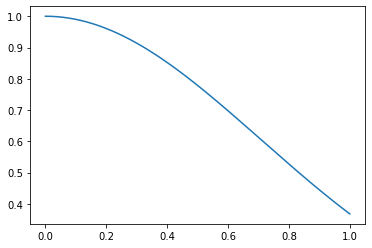

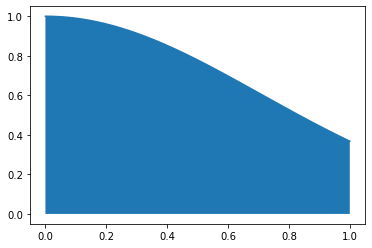

[[0.95372422]
 [0.57678796]
 [0.50988867]
 ...
 [0.2947486 ]
 [0.66950147]
 [0.32075129]]
RealValue: 0.746825, Approximation:0.7415
Estimated value on the full interval 1.483, real value 1.49365


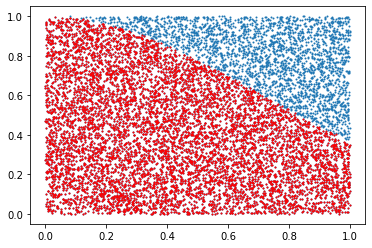

In [136]:
import numpy as np
import matplotlib.pyplot as plt

N=10000
REALVALUE_2 = REALVALUE/2

x = np.linspace(0,1,N)
y = np.exp(-x*x)

plt.plot(x,y)
plt.show()

plt.plot(x,y)
plt.fill_between(x,y)
plt.show()

# Monte Carlo Integration
x = np.random.uniform(low=0, high=1, size=[N, 1])
y = np.random.uniform(low=0, high=1, size=[N, 1])

print(y)

inside_bool = y <= np.exp(-x**2)

x_in = x[inside_bool]
y_in = y[inside_bool]

approx = float(np.sum(inside_bool))/N

print("RealValue: {}, Approximation:{}".format(REALVALUE_2, approx))
print("Estimated value on the full interval {}, real value {}".format(approx*2, REAL_VALUE))

plt.scatter(x, y, s=1)
plt.scatter(x_in, y_in, color='r', s=1)
plt.show()

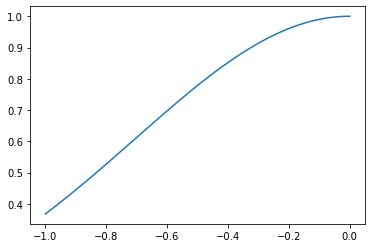

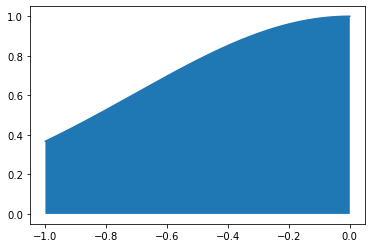

RealValue: 0.746825, Approximation:0.7508
Estimated value on the full interval 1.5016, real value 1.49365


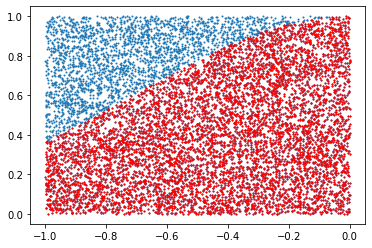

In [211]:
import numpy as np
import matplotlib.pyplot as plt

N=10000
REALVALUE_3 = REALVALUE_2

x = np.linspace(-1,0,N)
y = np.exp(-x*x)

plt.plot(x,y)
plt.show()

plt.plot(x,y)
plt.fill_between(x,y)
plt.show()

# Monte Carlo Integration
x = np.random.uniform(low=-1, high=0, size=[N, 1])
y = np.random.uniform(low=0, high=1, size=[N, 1])

inside_bool = y <= np.exp(-x**2)

x_in = x[inside_bool]
y_in = y[inside_bool]

approx = float(np.sum(inside_bool))/N

print("RealValue: {}, Approximation:{}".format(REALVALUE_3, approx))
print("Estimated value on the full interval {}, real value {}".format(approx*2, REAL_VALUE))

plt.scatter(x, y, s=1)
plt.scatter(x_in, y_in, color='r', s=1)
plt.show()

As we saw on both cases the value was close to the original integral.

_(30 Points)_ What is the error of this method? How do you compute it?

The Monte Carlo approximation is really close to the expected value, but to be honest this is only because of the way the collection of numbers was chosen by the computer algorithm, other results are: $1.4976, 1.4928, 1.49336 \dots$, then we can compute the error as the difference between the expected value and the approximation. This means that not in all cases an expected value will be given, then, how we can compute the error? we can be sure by the method itself, that depends on two factors: The first one, is determined by the number of points we choose to include in our interval (the N parameter), in this computation we used $N=10000$, but if we choose $N=1000,100, 10$ or $1$ we would have a greater error, by his argument, we can state that an increase in $N$ gives us a better approximation; second, the random number generator should be 'random', the argument here lies in the numbers generated, they should be uniform in the interval that we are interested.

In [453]:
def avg(a):
    return sum(a) / len(a)

def error(approxs):
    mean = avg(approxs)
    delta_sum = sum([(x - mean)**2 for x in approxs])
    return mean, math.sqrt(delta_sum/len(approxs))
    
# LOL
max_powers = 10**4
N=10000
REALVALUE = REAL_VALUE

approxs=[]
n=[]

means=[]
errors=[]

for i in range(1,max_powers+1):
    N = i
    
    approx = monte_carlo(N, -1, 1, 0, 1, f)
    
    #print("RealValue: {}, Approximation:{}".format(REALVALUE, approx))
    approxs.append(approx)
    n.append(N)
    #compute errors
    m, e = error(approxs)
    means.append(m)
    errors.append(e)

The points tend to be around a central value (our target value), then an statistical measure such as deviation (of the
means), could be used to estimate the error (which is what we did on the 'iteration vs mean value error' graph).

$$
M = \frac{\sum_{n=1}^{i}S_n}{i},
$$
$$
E = \sqrt{\frac{\sum_{n=1}^{i} (S_n - M)^2}{i}}
$$
Where $M$ is the mean of the values and $E$ the error function and $i$ is the number of samples. Using this equations on the montecarlo simulation data from $1$ to $10000$ we get

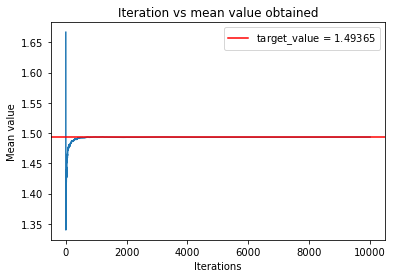

In [454]:
plt.plot(n[2:], means[2:])
plt.title(r'Iteration vs mean value obtained')
plt.axhline(y=REAL_VALUE, color='r', linestyle='-', label=r'target_value = $1.49365$')
plt.legend()
plt.xlabel(r'Iterations')
plt.ylabel(r'Mean value')

plt.show()

This graph represents $N$ versus the approximate value, we see that as $N$ increases the approximation tends to the real value which must imply that the error function will tend to zero as we see

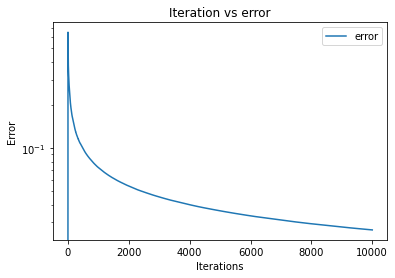

In [455]:
plt.title(r'Iteration vs error')
plt.plot(n, errors, label="error")
plt.xlabel(r'Iterations')
plt.ylabel(r'Error')
plt.yscale('log')
plt.legend()
plt.show()

By the central limit theorem these values will be normally distributed around a mean (in this case the value that we want to approximate).

_(15 Points)_ Compare the error found with other approaches, like the midpoint, trapezoidal, quadratures, Simpson, etc. Is this method better or worst? If the integral were in eight dimensions, which methodwould be better? Prove it.

for the first question we will use midpoint, trapezoidal, simpson to see which is better or worse.

In [456]:
def midpoint(n, a, b, f):
    x = np.linspace(a, b, n)
    x_p = []
    for i in range(2, (n - n %2)):
        x_p.append(f((x[i-2] + x[i-1]) / 2.0))
    approximation = (b - a) / float(n) * sum(x_p)
    return approximation

def trapezoidal(n, a, b, f):
    x = np.linspace(a, b, n)
    approximation = f(x[0]) + f(x[-1])
    approximation += 2*sum(f(x[1:-1]))
    approximation *= (b - a) / (2.0*n)
    return approximation
    
def simpson(n, a, b, f):
    dx = (b-a) / float(n)
    x = np.linspace(a, b, n)
    approximation = f(x[0]) + f(x[-1])
    for i in range(1, len(x)):
        factor = 3 + (-1)**(i+1)
        approximation += factor*f(x[i])
    approximation *= dx/3
    return approximation

In [457]:
a = -1
b = 1

%time midpoint_approx = midpoint(N,a,b,f)
%time trapezoidal_approx = trapezoidal(N, a, b, f)
%time simpson_approx = simpson(N, a, b, f)
%time monte_carlo_approx2 = monte_carlo(N, a, b, 0, 1, f)

CPU times: user 23.1 ms, sys: 12 µs, total: 23.1 ms
Wall time: 22.3 ms
CPU times: user 2.18 ms, sys: 0 ns, total: 2.18 ms
Wall time: 1.9 ms
CPU times: user 19.6 ms, sys: 0 ns, total: 19.6 ms
Wall time: 19.5 ms
CPU times: user 655 µs, sys: 0 ns, total: 655 µs
Wall time: 510 µs


In [458]:
print("Real value: {}".format(REAL_VALUE))

print("Midpoint approximation: {}, error: {}".format(midpoint_approx, abs(REAL_VALUE - midpoint_approx)))
print("Trapezoidal approximation: {}, error: {}".format(trapezoidal_approx, abs(REAL_VALUE - trapezoidal_approx)))
print("Simpson approximation: {}, error: {}".format(simpson_approx, abs(REAL_VALUE - simpson_approx)))
print("Monte Carlo approximation: {}, error: {}".format(monte_carlo_approx2, abs(REAL_VALUE - approx)))

Real value: 1.49365
Midpoint approximation: 1.4934253126454469, error: 0.00022468735455305477
Trapezoidal approximation: 1.493498895892739, error: 0.00015110410726082435
Simpson approximation: 1.4935724717809802, error: 7.752821901974016e-05
Monte Carlo approximation: 1.49, error: 0.011350000000000193


As we see for our particular $N$ the best method is Simpson let's see how behaves between $1$ and our $N=10000$.

# Warnning: This code will take a while to execute...

In [434]:
def run_approximations(max_power):
    approximations = []

    for n in range(1, 10**max_power):
        approximations.append([n, midpoint(n,a,b,f), trapezoidal(n, a, b, f), simpson(n, a, b, f), monte_carlo(n, a, b, 0, 1, f)])
    return approximations

%time approximations = run_approximations(4)

CPU times: user 3min 20s, sys: 5.26 ms, total: 3min 20s
Wall time: 3min 20s


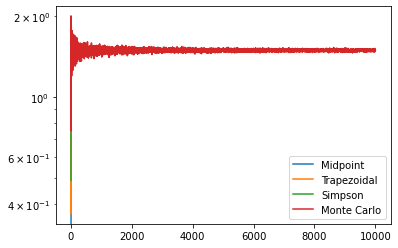

In [459]:
arr = np.array(approximations)

iterations = arr[:,0]

midpoint_series = arr[:,1]
trapezoidal_series = arr[:,2]
simpson_series = arr[:,3]
monte_carlo_series = arr[:,4]

plt.plot(iterations, arr[:, 1], label="Midpoint")
plt.plot(iterations, arr[:, 2], label="Trapezoidal")
plt.plot(iterations, arr[:, 3], label="Simpson")
plt.plot(iterations, arr[:, 4], label="Monte Carlo")

#plt.xlim(9995, 10000)
plt.yscale('log')
plt.legend()

Overall it seems that the other methods behave better, lets have a closer look

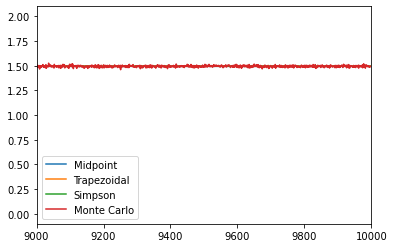

In [460]:
plt.plot(iterations, arr[:, 1], label="Midpoint")
plt.plot(iterations, arr[:, 2], label="Trapezoidal")
plt.plot(iterations, arr[:, 3], label="Simpson")
plt.plot(iterations, arr[:, 4], label="Monte Carlo")

plt.xlim(9000, 10000)
plt.legend()

Not much for a difference... let's see how the errors behave at each one as we did on the montecarlo method previously

In [437]:
def compute_error(apprx):
    approx = []
    means = []
    errors = []
    for a in apprx:
        approx.append(a)
        m, e = error(approx)
        #means.append(m)
        errors.append(e)
    return errors, means

# Warnning: This code will take a while to execute...

In [438]:
%time midpoint_errors, midpoint_means = compute_error(arr[:, 1])

CPU times: user 24.1 s, sys: 0 ns, total: 24.1 s
Wall time: 24.1 s


In [439]:
%time trapezoidal_errors, trapezoidal_means = compute_error(arr[:, 2])

CPU times: user 24.5 s, sys: 0 ns, total: 24.5 s
Wall time: 24.5 s


In [440]:
%time simpson_errors, simpson_means = compute_error(arr[:, 3])

CPU times: user 24.4 s, sys: 0 ns, total: 24.4 s
Wall time: 24.4 s


In [441]:
%time monte_carlo_errors, monte_carlo_means = compute_error(arr[:, 4])

CPU times: user 24.8 s, sys: 0 ns, total: 24.8 s
Wall time: 24.8 s


In [442]:
iterations_array = np.arange(len(monte_carlo_errors))

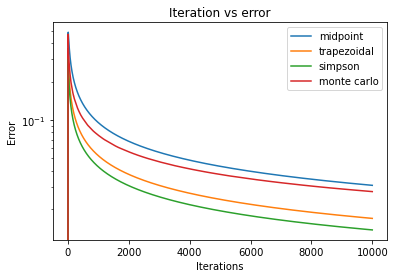

In [461]:
plt.title(r'Iteration vs error')
plt.plot(iterations_array, midpoint_errors, label="midpoint")
plt.plot(iterations_array, trapezoidal_errors, label="trapezoidal")
plt.plot(iterations_array, simpson_errors, label="simpson")
plt.plot(iterations_array, monte_carlo_errors, label="monte carlo")
plt.xlabel(r'Iterations')
plt.ylabel(r'Error')
plt.yscale('log')
plt.legend()
plt.show()

Now it is clear that best method in this case is simpson, but now lets see how long does it taketo compute with each method at $N = 10000$

In [451]:
%time midpoint_approx = midpoint(N,a,b,f)
%time trapezoidal_approx = trapezoidal(N, a, b, f)
%time simpson_approx = simpson(N, a, b, f)
%time monte_carlo_approx2 = monte_carlo(N, a, b, 0, 1, f)

CPU times: user 22.2 ms, sys: 9 µs, total: 22.2 ms
Wall time: 21.6 ms
CPU times: user 0 ns, sys: 1.82 ms, total: 1.82 ms
Wall time: 1.62 ms
CPU times: user 18.7 ms, sys: 1.09 ms, total: 19.8 ms
Wall time: 19.8 ms
CPU times: user 585 µs, sys: 3 µs, total: 588 µs
Wall time: 463 µs


Monte carlo is clearly the fastest by far in three orders of magnitude which is a huge advantage if we are dealing with a much more complicated space, and eight dimensional space for example, because as we increase the dimension on the problem the space that we have to look will be n+1, meaning that representing the function at each point will increase the magnitude of the problem by one, as the dimension increases computational time will increase, and since monte carlo as we saw is much more faster than the other ones. 